##### import pandas as pd 
import numpy as np
data = pd.read_csv('model data final.csv')
data

In [1]:
import pandas as pd
import numpy as np 
data = pd.read_csv('LSTM_for_trump_result.csv')
data.set_index('Day',inplace=True)
stock = data
# stock.drop(['Year','Month'],axis=1,inplace=True)
stock

,C1,I,G,NX,new_cases,new_deaths,GDP
Day,,,,,,,
2015-01-02,-15.776760,7.627000e+07,1214.892,-435.900000,0.0,0.000000,2.610000e+11
2015-01-05,-16.496330,1.161600e+08,1214.892,-435.900000,0.0,0.000000,2.680000e+11
2015-01-06,-16.548551,1.018700e+08,1214.892,-435.900000,0.0,0.000000,2.650000e+11
2015-01-07,-13.489590,9.103000e+07,1214.892,-435.900000,0.0,0.000000,2.680000e+11
2015-01-08,-10.824681,1.148900e+08,1214.892,-435.900000,0.0,0.000000,2.670000e+11
...,...,...,...,...,...,...,...
2021-11-24,7.459153,3.850727e+08,1570.000,-444.826228,0.0,0.000476,3.054954e+11
2021-11-25,7.358248,3.841653e+08,1570.000,-400.494384,0.0,0.000436,3.057250e+11
2021-11-26,7.855719,3.833722e+08,1570.000,-400.323036,2.0,0.000399,3.058622e+11


In [2]:
covid = data[['new_cases','new_deaths']]
covid
covid.fillna(0,inplace=True)

from sklearn.decomposition import PCA  # 主成分分析

# pca 
pca = PCA(n_components=0.9)  # 一般 n_components 为0.9-0.95 左右
pca_data = pca.fit_transform(covid)
pca_data = pd.DataFrame(pca_data)
pca_data.index = data.index 
pca_data


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 0.8))  
scaled_data = scaler.fit_transform(pca_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.index = data.index
covid_data = scaled_data
covid_data

C:\Users\june.wu\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,0
Day,
2015-01-02,2.468913e-07
2015-01-05,2.468913e-07
2015-01-06,2.468913e-07
2015-01-07,2.468913e-07
2015-01-08,2.468913e-07
...,...
2021-11-24,2.468915e-07
2021-11-25,2.468915e-07
2021-11-26,1.272074e-06


In [3]:
# 查看皮尔森相关系数
corr = stock.corr()
corr

,C1,I,G,NX,new_cases,new_deaths,GDP
C1,1.000000,0.517306,0.852820,-0.238838,0.251672,0.484683,0.170458
I,0.517306,1.000000,0.602065,-0.177193,0.087844,0.294786,0.152623
G,0.852820,0.602065,1.000000,-0.087344,0.150480,0.348842,0.308488
NX,-0.238838,-0.177193,-0.087344,1.000000,0.069551,-0.291652,0.063575
new_cases,0.251672,0.087844,0.150480,0.069551,1.000000,0.318072,-0.504339
new_deaths,0.484683,0.294786,0.348842,-0.291652,0.318072,1.000000,-0.512021
GDP,0.170458,0.152623,0.308488,0.063575,-0.504339,-0.512021,1.000000


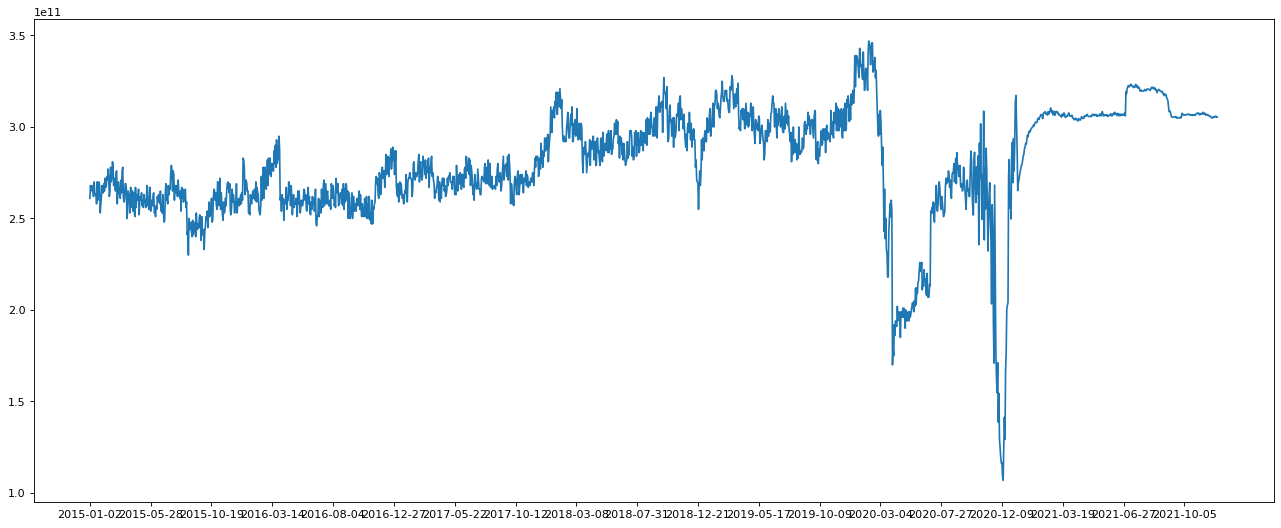

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8),dpi=80)
plt.plot(stock['GDP'])
plt.xticks(ticks=stock.index[::100],labels=stock.index[::100])
plt.show()

In [5]:
time_stamp = 3 # 划分步长
train_num = 1457  # 设定训练集的数量


# 划分训练集与验证集
train = stock[:train_num + time_stamp]
test = stock[train_num - time_stamp :]


# 归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(train)
x_train, y_train = [], []
scaled_data = scaled_data.tolist()


In [6]:
# 训练集
for i in range(time_stamp, len(train)):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i][-1])
x_train, y_train = np.array(x_train), np.array(y_train)

# 验证集
scaled_data = scaler.fit_transform(test)
scaled_data = scaled_data.tolist()
x_test, y_test = [], []
for i in range(time_stamp, len(test)):
    x_test.append(scaled_data[i - time_stamp:i])
    y_test.append(scaled_data[i][-1])
    print(scaled_data[i - time_stamp:i])
    print(scaled_data[i][-1])
x_test , y_test = np.array(x_test) , np.array(y_test)

[[0.91771300170451, 0.6004282192593853, 0.0, 0.0, 0.02979022084934826, 0.17740619148350067, 0.8050358574326275], [0.9387524887856208, 0.6027140528286175, 0.0, 0.026949687608788242, 0.0293404215593715, 0.13573955992940123, 0.8279759599924994], [0.912748420386978, 0.6989248232113633, 0.0, 0.12648053490754796, 0.03361415555388005, 0.3702754447596929, 0.7539109946042297]]
0.7009743877204291
[[0.9387524887856208, 0.6027140528286175, 0.0, 0.026949687608788242, 0.0293404215593715, 0.13573955992940123, 0.8279759599924994], [0.912748420386978, 0.6989248232113633, 0.0, 0.12648053490754796, 0.03361415555388005, 0.3702754447596929, 0.7539109946042297], [0.9102878746424534, 0.6663279287419865, 0.0, 0.12574749981453515, 0.03831205924919291, 0.41666715824260775, 0.7009743877204291]]
0.7887102860126733
[[0.912748420386978, 0.6989248232113633, 0.0, 0.12648053490754796, 0.03361415555388005, 0.3702754447596929, 0.7539109946042297], [0.9102878746424534, 0.6663279287419865, 0.0, 0.12574749981453515, 0.0383

In [7]:
#导入序贯模型
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
# 超参数
epochs = 3 # 周期参数
batch_size = 32   # 每组样本个数
# LSTM 参数: return_sequences=True LSTM输出为一个序列。默认为False，输出一个值。
# input_dim：输入单个样本特征值的维度
# input_length：输入的时间点长度
model = Sequential() # 贯序模型
# 加入LSTM 模型
model.add(LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
# 加入LSTM 模型
model.add(LSTM(units=50))
# 设置全连接层
model.add(Dense(1))
# 设置优化器
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
46/46 [==============================] - 0s 4ms/step - loss: 0.0641
Epoch 2/3
46/46 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 3/3
46/46 [==============================] - 0s 5ms/step - loss: 0.0032


In [8]:
# 预测每日的GDP
predict_close_price = model.predict(x_test)
scaler.fit_transform(pd.DataFrame(test['GDP'].values))
# 反归一化
pred = scaler.inverse_transform(predict_close_price)
y_test = scaler.inverse_transform([y_test])
predict_close_price

array([[ 0.7119535 ],
       [ 0.6668208 ],
       [ 0.58423245],
       [ 0.59656125],
       [ 0.6553545 ],
       [ 0.67301685],
       [ 0.6024778 ],
       [ 0.5627856 ],
       [ 0.5319989 ],
       [ 0.66049707],
       [ 0.66036755],
       [ 0.6357833 ],
       [ 0.5290498 ],
       [ 0.54182893],
       [ 0.63999724],
       [ 0.65292007],
       [ 0.5856052 ],
       [ 0.43549806],
       [ 0.55750513],
       [ 0.58897   ],
       [ 0.64284164],
       [ 0.5209989 ],
       [ 0.41158378],
       [ 0.4191142 ],
       [ 0.5331732 ],
       [ 0.5596929 ],
       [ 0.45472214],
       [ 0.30508453],
       [ 0.2871242 ],
       [ 0.3345698 ],
       [ 0.43638444],
       [ 0.26596057],
       [ 0.1414932 ],
       [ 0.22477621],
       [ 0.39305446],
       [ 0.2784905 ],
       [ 0.22285084],
       [ 0.18087251],
       [ 0.15315242],
       [ 0.131227  ],
       [ 0.07327393],
       [ 0.05697731],
       [ 0.00610343],
       [-0.01809401],
       [-0.04630103],
       [-0

In [9]:
predict_close_price.shape

(398, 1)

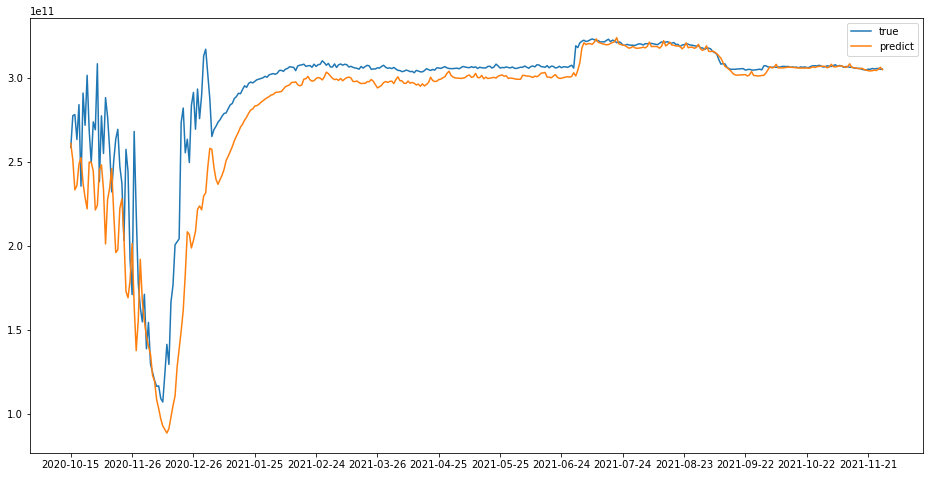

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
dict_data = {
    'Predictions': pred.reshape(1,-1)[0] ,# 设置放大参数
    'GDP_per_day': y_test[0]
}
data_pd = pd.DataFrame(dict_data)


plt.plot(data_pd['GDP_per_day'],label = 'true')
plt.plot(data_pd['Predictions'],label = 'predict')

plt.xticks(data_pd.index[::30],stock[train_num:].index[::30])
plt.legend()
plt.show()

In [11]:
data_pd.to_csv('trump.csv')

KeyError: 'val_loss'

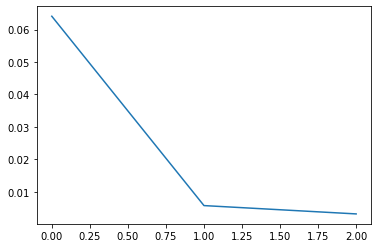

In [12]:

from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()